In [ ]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from math import factorial
from scipy import stats as st
from datetime import timedelta as td
from datetime import datetime

In [ ]:
# Carga los archivos de datos en diferentes DataFrames
planes = pd.read_csv('/datasets/megaline_plans.csv')
usuarios = pd.read_csv('/datasets/megaline_users.csv', parse_dates=['reg_date'])
llamadas = pd.read_csv('/datasets/megaline_calls.csv', parse_dates=['call_date'])
mensajes = pd.read_csv('/datasets/megaline_messages.csv', parse_dates=['message_date'])
internet = pd.read_csv('/datasets/megaline_internet.csv', parse_dates=['session_date'])

In [ ]:
# Imprime la información general/resumen sobre el DataFrame de los planes
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
# Imprime una muestra de los datos para los planes
planes.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- De momento no se observa ningun problema con los datos, el plan mas caro recibe mayores beneficios siendo mas mb por mes, mas minutos y el costo por mensajes, gb y minutos es un beneficio aparente por tener un mejor plan.

In [ ]:
# Corrige los problemas obvios con los datos basándote en las observaciones iniciales.
## No hay problema aparente.

In [ ]:
# Agrega factores adicionales a los datos si crees que pudieran ser útiles.
planes['gb_per_month_included'] = planes['mb_per_month_included'] / 1024

In [ ]:
# Aqui corregimos la columna de float a int64
planes['gb_per_month_included'] = planes['gb_per_month_included'].astype('int64')

In [ ]:
planes.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


In [ ]:
# Imprime la información general/resumen sobre el DataFrame de los usuarios
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [ ]:
# Imprime una muestra de los datos para los usuarios
usuarios.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [ ]:
# Exploraremos en churn_date para identificar problemas
usuarios['churn_date'].isna().sum()

466

- Despues de analizar los datos conclui con transformar la columna reg_date a datetime desde que se leyo el archivo para poder trabajarla como formato de fecha, de igual manera se observaron valores ausentes en 'churn_date' los cuales nos indican que no ha terminado su plan, dicho de otra forma que siguen activos, entonces impute la fecha del dia de hoy 14/02/2023.

In [ ]:
# Se decidio dejar los valores ausentes como tal.

In [ ]:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [ ]:
usuarios.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [ ]:
# Añadiremos una columna con lo que paga cada usuario por su plan inicial
def pago_por_plan(row):
    planes = row['plan']
    if planes == 'surf':
        return 20
    else:
        return 70
usuarios['usd_per_plan'] = usuarios.apply(pago_por_plan, axis=1)

In [ ]:
usuarios

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,usd_per_plan
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,70
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,20
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,20
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,20
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,20
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,20
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,70
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,20


In [ ]:
# Imprime la información/resumen general sobre el DataFrame de las llamadas
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [ ]:
# Imprime una muestra de datos para llamadas
llamadas.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [ ]:
llamadas[llamadas['duration'] == 0.0]

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


- Aqui los problemas principales identificados fueron el tipo de datos de call_date que se cambiaron a datetime, despues observe que hay llamadas con duración 0, revise cuantos datos son para ver si podian ser eliminados sin perjudicar, pero represetan el 23% de los datos por ende decidí dejarlos así pero habrá que interpretar que fueron llamadas perdidas asi que no se cobrará. De igual manera se reviso si existian valores atipicos en alguna de las columnas y no es el caso, por consiguiente procederemos con el analisis.

In [ ]:
# Aqui se realiza un redondeo de los minutos hacia arriba.
llamadas['duration'] = np.ceil(llamadas['duration'])
llamadas

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0
137731,1499_200,1499,2018-10-20,11.0
137732,1499_201,1499,2018-09-21,9.0
137733,1499_202,1499,2018-10-10,1.0


In [ ]:
# Se añade una columna 'month' para que guarde el mes.
llamadas['month'] = pd.DatetimeIndex(llamadas['call_date']).month

In [ ]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
mensajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
# Imprime una muestra de datos para los mensajes
mensajes.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


- En estos datos podemos observar las fechas en la que los usuarios enviaron mensajes, de igual manera el principal problema fue message_date estaba en tipo str y se cambio a datetime para poder incluir una columna 'month' para poder hacer uso de ella en las futuras agrupaciones por mes por usuario.

In [ ]:
# Aqui se añadira la cantidad de mensajes que envio cada usuario por mes
mensajes_x_usuario = mensajes.groupby('user_id')['id'].count()

In [ ]:
mensajes['month'] = pd.DatetimeIndex(mensajes['message_date']).month
mensajes_mes = mensajes.groupby(['month', 'user_id']).agg({'user_id': ['count']}).reset_index()

In [ ]:
mensajes_x_usuario

user_id
1000     11
1001    207
1002     88
1003     50
1004    177
       ... 
1491    409
1492    108
1494    174
1496     65
1497     50
Name: id, Length: 402, dtype: int64

In [ ]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [ ]:
# Imprime una muestra de datos para el tráfico de internet
internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [ ]:
internet[internet['mb_used'] >= 1690]

,id,user_id,session_date,mb_used
92312,1430_447,1430,2018-12-30,1693.47


- En este dataframe podemos observar que hay usuarios que no usaron ni un mb, asi como en la columna de llamadas habian usuarios con 0 minutos aqui se realizo un calculo para ver cuantos datos representaban y nos dio 13%, sigue siendo un valor alto como para solo eliminar los datos asi que utilizaré el mismo criterio y no se cobrará a aquellos que hayan usado 0 mb. De igual manera se deberia de añadir una columna de gb_used para poder realizar los calculos mas facilmente.

In [ ]:
# Aqui añadiremos una columna 'month'
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


In [ ]:
# Imprime las condiciones del plan y asegúrate de que te resulten claros
planes.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


In [ ]:
# Aqui agrupamos la cantidad de llamadas y minutos realizados por cada usuario dependiendo del mes.
llamadas_x_mes = llamadas.groupby(['month', 'user_id']).agg({'duration': ['sum'], 'user_id':['count']}).reset_index()
llamadas_x_mes.columns = ['month', 'user_id', 'minutes_x_month', 'calls_x_month']
llamadas_x_mes

,month,user_id,minutes_x_month,calls_x_month
0,1,1042,114.0,18
1,1,1077,290.0,42
2,1,1185,181.0,23
3,1,1196,287.0,42
4,1,1214,16.0,5
...,...,...,...,...
2253,12,1495,492.0,65
2254,12,1496,294.0,40
2255,12,1497,300.0,54
2256,12,1498,339.0,39


In [ ]:
# Calcula el número de llamadas hechas por cada usuario por mes. Guarda el resultado.
llamadas_mes = llamadas.groupby(['month', 'user_id']).agg({'user_id': ['count']}).reset_index()
llamadas_mes.columns = ['month', 'user_id', 'calls_x_month']
llamadas_mes

,month,user_id,calls_x_month
0,1,1042,18
1,1,1077,42
2,1,1185,23
3,1,1196,42
4,1,1214,5
...,...,...,...
2253,12,1495,65
2254,12,1496,40
2255,12,1497,54
2256,12,1498,39


In [ ]:
# Calcula la cantidad de minutos que usó cada usuario por mes. Guarda el resultado.
minutos_mes = llamadas.groupby(['month', 'user_id']).agg({'duration': ['sum']}).reset_index()
minutos_mes

,month,user_id,duration
,,,sum
0,1,1042,114.0
1,1,1077,290.0
2,1,1185,181.0
3,1,1196,287.0
4,1,1214,16.0
...,...,...,...
2253,12,1495,492.0
2254,12,1496,294.0
2255,12,1497,300.0


In [ ]:
# Calcula el número de mensajes enviados por cada usuario por mes. Guarda el resultado.
mensajes_mes = mensajes.groupby(['month', 'user_id']).agg({'user_id': ['count']}).reset_index()
mensajes_mes.columns = ['month', 'user_id', 'mensajes_x_mes']
mensajes_mes

,month,user_id,mensajes_x_mes
0,1,1077,37
1,1,1196,23
2,1,1214,2
3,1,1362,21
4,2,1028,12
...,...,...,...
1801,12,1491,43
1802,12,1492,37
1803,12,1494,33
1804,12,1496,11


In [ ]:
# Aqui se agruparan los datos del dataframe internet para dividirlos por mes
internet_mes = internet.groupby(['month', 'user_id']).agg({'mb_used': ['sum'], 'id': ['count']}).reset_index()
internet_mes.columns = ['month', 'user_id', 'monthly_mb_used', 'sessions']
internet_mes['monthly_mb_used'] = internet_mes['monthly_mb_used'].astype('int64')
internet_mes['monthly_gb_used'] = (internet_mes['monthly_mb_used'] / 1024)
internet_mes['monthly_gb_used'] = np.ceil(internet_mes['monthly_gb_used'])
internet_mes

,month,user_id,monthly_mb_used,sessions,monthly_gb_used
0,1,1042,1854,8,2.0
1,1,1077,10635,22,11.0
2,1,1185,6812,25,7.0
3,1,1196,8908,15,9.0
4,1,1214,1315,4,2.0
...,...,...,...,...,...
2272,12,1495,24097,71,24.0
2273,12,1496,16438,53,17.0
2274,12,1497,11106,31,11.0
2275,12,1498,23137,65,23.0


In [ ]:
# Calcula el volumen del trafico de internet usado por cada usuario por mes. Guarda el resultado.
inter_used = internet_mes.groupby(['month', 'user_id']).agg({'monthly_gb_used': ['sum']}).reset_index()
inter_used.columns = ['month', 'user_id', 'monthly_gb_used']
inter_used

,month,user_id,monthly_gb_used
0,1,1042,2.0
1,1,1077,11.0
2,1,1185,7.0
3,1,1196,9.0
4,1,1214,2.0
...,...,...,...
2272,12,1495,24.0
2273,12,1496,17.0
2274,12,1497,11.0
2275,12,1498,23.0


In [ ]:
# Combina los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes
combi_llamadas = llamadas_x_mes.merge(internet_mes, how='outer').fillna(0)
combi_mensajes = combi_llamadas.merge(mensajes_mes, how='outer').fillna(0)

In [ ]:
combi_llamadas

,month,user_id,minutes_x_month,calls_x_month,monthly_mb_used,sessions,monthly_gb_used
0,1,1042,114.0,18.0,1854.0,8.0,2.0
1,1,1077,290.0,42.0,10635.0,22.0,11.0
2,1,1185,181.0,23.0,6812.0,25.0,7.0
3,1,1196,287.0,42.0,8908.0,15.0,9.0
4,1,1214,16.0,5.0,1315.0,4.0,2.0
...,...,...,...,...,...,...,...
2287,12,1131,0.0,0.0,15212.0,28.0,15.0
2288,12,1137,0.0,0.0,6745.0,16.0,7.0
2289,12,1194,0.0,0.0,31088.0,63.0,31.0
2290,12,1204,0.0,0.0,36730.0,80.0,36.0


In [ ]:
# Añade la información del plan
combi_total = combi_mensajes.merge(usuarios, how='outer').fillna(0)
combi_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   month            2303 non-null   float64       
 1   user_id          2303 non-null   int64         
 2   minutes_x_month  2303 non-null   float64       
 3   calls_x_month    2303 non-null   float64       
 4   monthly_mb_used  2303 non-null   float64       
 5   sessions         2303 non-null   float64       
 6   monthly_gb_used  2303 non-null   float64       
 7   mensajes_x_mes   2303 non-null   float64       
 8   first_name       2303 non-null   object        
 9   last_name        2303 non-null   object        
 10  age              2303 non-null   int64         
 11  city             2303 non-null   object        
 12  reg_date         2303 non-null   datetime64[ns]
 13  plan             2303 non-null   object        
 14  churn_date       2303 non-null   object 

In [ ]:
# Calcula el ingreso mensual para cada usuario
combi_total_copy = combi_total.copy()
def costo_gb_extra(row):
    gigas = row['monthly_gb_used']
    plan = row['plan']
    if plan == 'surf':
        if gigas > 15:
            return (gigas - 15) * 10
    if plan == 'ultimate':
        if gigas > 30:
            return (gigas - 30) * 7
def costo_min_extra(row):
    plan = row['plan']
    minutes = row['minutes_x_month']
    if plan == 'surf':
        if minutes > 500:
             return (minutes - 500) * 0.3
    if plan == 'ultimate':
        if minutes > 3000:
            return (minutes - 3000) * 0.1
def costo_mens_extra(row):
    plan = row['plan']
    sms = row['mensajes_x_mes']
    if plan == 'surf':
        if sms > 50:
             return (sms - 50) * 0.3
    if plan == 'ultimate':
        if sms > 1000:
            return (sms - 1000) * 0.1
combi_total_copy['monthly_gb_usd_extra'] = combi_total.apply(costo_gb_extra, axis=1).fillna(0)
combi_total_copy['monthly_minutes_usd_extra'] = combi_total.apply(costo_min_extra, axis=1).fillna(0)
combi_total_copy['monthly_sms_usd_extra'] = combi_total.apply(costo_mens_extra, axis=1).fillna(0)
combi_total_copy['ingreso_extras_mensual'] = combi_total_copy['monthly_gb_usd_extra'] + combi_total_copy['monthly_minutes_usd_extra'] + combi_total_copy['monthly_sms_usd_extra']
combi_total_copy['ingreso_total_mensual'] = combi_total_copy['usd_per_plan'] + combi_total_copy['monthly_gb_usd_extra'] + combi_total_copy['monthly_minutes_usd_extra'] + combi_total_copy['monthly_sms_usd_extra']

In [ ]:
pd.set_option('display.max_columns', None)
combi_total_copy

,month,user_id,minutes_x_month,calls_x_month,monthly_mb_used,sessions,monthly_gb_used,mensajes_x_mes,first_name,last_name,age,city,reg_date,plan,churn_date,usd_per_plan,monthly_gb_usd_extra,monthly_minutes_usd_extra,monthly_sms_usd_extra,ingreso_extras_mensual,ingreso_total_mensual
0,1.0,1042,114.0,18.0,1854.0,8.0,2.0,0.0,Clementina,Mclaughlin,40,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15,surf,0,20,0.0,0.0,0.0,0.0,20.0
1,2.0,1042,254.0,37.0,6801.0,14.0,7.0,0.0,Clementina,Mclaughlin,40,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15,surf,0,20,0.0,0.0,0.0,0.0,20.0
2,3.0,1042,214.0,39.0,7400.0,14.0,8.0,0.0,Clementina,Mclaughlin,40,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15,surf,0,20,0.0,0.0,0.0,0.0,20.0
3,4.0,1042,279.0,44.0,7102.0,18.0,7.0,0.0,Clementina,Mclaughlin,40,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15,surf,0,20,0.0,0.0,0.0,0.0,20.0
4,5.0,1042,489.0,51.0,9061.0,21.0,9.0,0.0,Clementina,Mclaughlin,40,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15,surf,0,20,0.0,0.0,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,0.0,1307,0.0,0.0,0.0,0.0,0.0,0.0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,0,20,0.0,0.0,0.0,0.0,20.0
2299,0.0,1319,0.0,0.0,0.0,0.0,0.0,0.0,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,0,20,0.0,0.0,0.0,0.0,20.0
2300,0.0,1378,0.0,0.0,0.0,0.0,0.0,0.0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,0,20,0.0,0.0,0.0,0.0,20.0
2301,0.0,1463,0.0,0.0,0.0,0.0,0.0,0.0,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,0,70,0.0,0.0,0.0,0.0,70.0


<AxesSubplot:xlabel='month'>

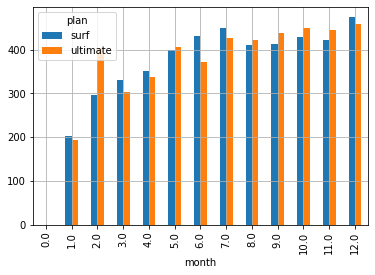

In [ ]:
# Compara la duración promedio de llamadas por cada plan por cada mes. Dibuja una gráfica de barras para visualizarlo.
llamadas_pivot = combi_total_copy.pivot_table(index='month', columns='plan', values='minutes_x_month')
llamadas_pivot.plot(kind='bar', grid=True)

<AxesSubplot:xlabel='month'>

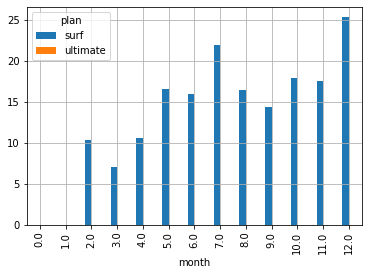

In [ ]:
# Compara el número de minutos que los usuarios de cada plan requieren cada mes. Traza un histograma.
minutos_pivot = combi_total_copy.pivot_table(index='month', columns='plan', values='monthly_minutes_usd_extra')
minutos_pivot.plot(kind='bar', grid=True)

In [ ]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media_llamadas = combi_total_copy['minutes_x_month'].mean()
var_llamadas = combi_total_copy['minutes_x_month'].var()
print(f'La media de la duración mensual de llamadas es: {media_llamadas}')
print(f'La varianza de la duración mensual de llamadas es: {var_llamadas}')

La media de la duración mensual de llamadas es: 427.419452887538
La varianza de la duración mensual de llamadas es: 56401.63979518273


<AxesSubplot:>

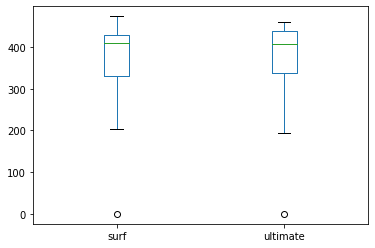

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.
llamadas_pivot.plot(kind='box')

<AxesSubplot:>

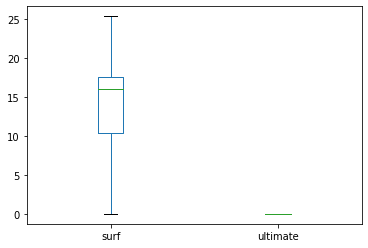

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad de llamadas extra.
minutos_pivot.plot(kind='box')

- Con estos graficos podemos observar que existen diferencias claras entre ambos planes, habiendo mas usuarios para el plan surf nos da una muestra de lo que representan. De igual manera ambas medias estan bastante parecidas en cuanto a la cantidad de minutos usados dentro de su plan, podriamos concluir que ambos planes tienen sus pros y contras ya que tras un analisis los usuarios del plan 'ultimate' casi no fueron cobrados por minutos extra debido a que no utilizaron todos los incluidos dentro de su plan, de igual manera el plan 'surf' fueron cargados muchos con extras por la cantidad de minutos fuera de su plan que utilizaron, en conclusion si quisieran decantarse por un plan considero que el plan ultimate es mejor en cuanto a llamadas/minutos por llamada se refiere.

<AxesSubplot:xlabel='month'>

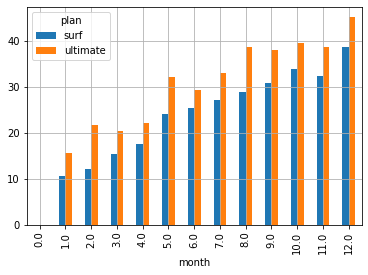

In [ ]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
sms_pivot = combi_total_copy.pivot_table(index='month', columns='plan', values='mensajes_x_mes')
sms_pivot.plot(kind='bar', grid=True)

<AxesSubplot:xlabel='month'>

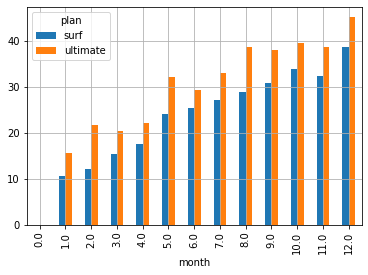

In [ ]:
# Compara la cantidad de mensajes extras consumidos por usuarios por plan
sms_pivot_extra = combi_total_copy.pivot_table(index='month', columns='plan', values='monthly_sms_usd_extra')
sms_pivot.plot(kind='bar', grid=True)

In [ ]:
# Calcula la media y la varianza de la cantidad de mensajes por usuario por mes.
media_sms = combi_total_copy['mensajes_x_mes'].mean()
var_sms = combi_total_copy['mensajes_x_mes'].var()
print(f'La media de la cantidad de mensajes es: {media_sms}')
print(f'La varianza de la cantidad de mensajes es: {var_sms}')

La media de la cantidad de mensajes es: 33.02257924446374
La varianza de la cantidad de mensajes es: 1160.4860234054247


<AxesSubplot:>

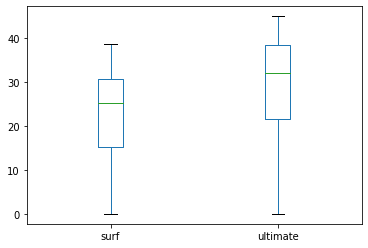

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad de mensajes.
sms_pivot.plot(kind='box')

<AxesSubplot:>

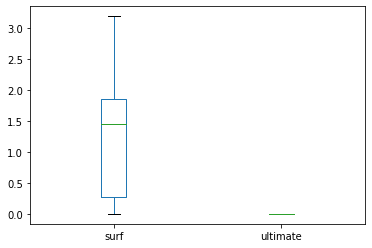

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad de mensajes extra.
sms_pivot_extra.plot(kind='box')

- Al igual que con las graficas de la cantidad de llamadas/minutos podemos observar que existen diferencias entre los planes cuando se refiere a la cantidad de mensajes enviados por usuario por mes, las medias son similares pero en esta ocasion se observa un cambio para el plan ultimate, podriamos decir que los usuarios que pagan el plan ultimate sacan provecho de su plan mandando mas mensajes contrastados contra el plan surf, de igual manera para el plan ultimate no se realizo cobros extras por mensaje debido a que casi ningun usuario excedio su plan y por otro lado el plan surf si tuvo varios cobros extra. Por consiguiente podemos concluir que el plan ultimate vale mas la pena debido a que aunque sea mas caro que el plan surf no estan pagando casi nada de extras ni por mensajes ni por llamadas.

<AxesSubplot:xlabel='month'>

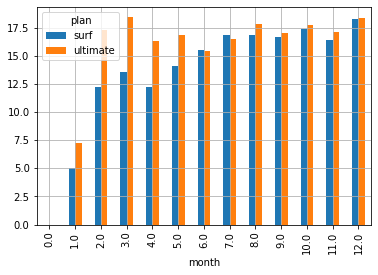

In [ ]:
# Compara la cantidad de tráfico de internet consumido por usuarios por plan
internet_pivot = combi_total_copy.pivot_table(index='month', columns='plan', values='monthly_gb_used')
internet_pivot.plot(kind='bar', grid=True)

<AxesSubplot:xlabel='month'>

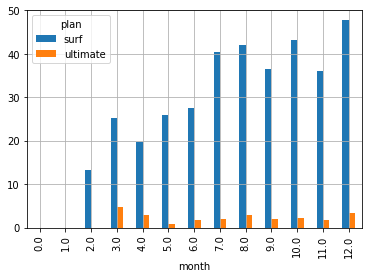

In [ ]:
# Compara la cantidad de gb extras consumidos por usuarios por plan
internet_pivot_extra = combi_total_copy.pivot_table(index='month', columns='plan', values='monthly_gb_usd_extra')
internet_pivot_extra.plot(kind='bar', grid=True)

In [ ]:
# Calcula la media y la varianza de la cantidad de gb usados por usuario por mes.
media_internet = combi_total_copy['monthly_gb_used'].mean()
var_internet = combi_total_copy['monthly_gb_used'].var()
print(f'La media de la cantidad de gb es: {media_internet}')
print(f'La varianza de la cantidad de gb es: {var_internet}')

La media de la cantidad de gb es: 16.794615718627877
La varianza de la cantidad de gb es: 61.75058785182927


<AxesSubplot:>

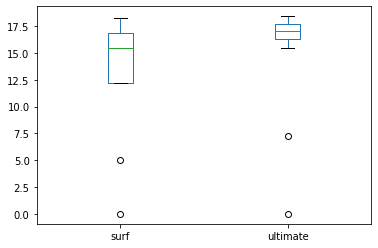

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad de gb.
internet_pivot.plot(kind='box')

<AxesSubplot:>

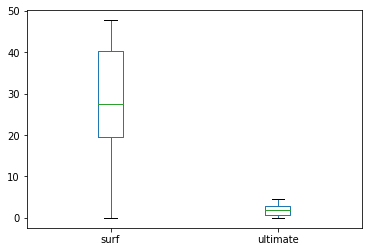

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad de gb extra.
internet_pivot_extra.plot(kind='box')

- En estos graficos al igual que en los graficos de llamadas y mensajes podemos observar claras diferencias entre cada plan, de igual manera como lo habia comentado anteriormente cada plan tiene sus pros y contras y aqui es donde observamos mas dispersion en la cantidad de extras debido a que los usuarios del plan ultimate si consumieron datos extras fuera de su plan, pero de igual manera es una muestra pequeña en comparacion con los usuarios del plan surf, dicho de otra manera los usuarios del plan ultimate tienen la mayor cantidad de gb usados pero de igual manera tambien tienen usuarios que no pagaron un extra por dichos gb, por consiguiente la conclusion es que el plan ultimate es mas rentable.

<AxesSubplot:xlabel='month'>

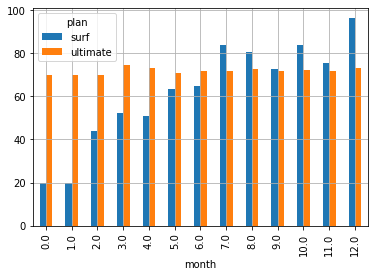

In [ ]:
# Compara la cantidad de tráfico de internet consumido por usuarios por plan
usd_total_pivot = combi_total_copy.pivot_table(index='month', columns='plan', values='ingreso_total_mensual')
usd_total_pivot.plot(kind='bar', grid=True)

<AxesSubplot:xlabel='month'>

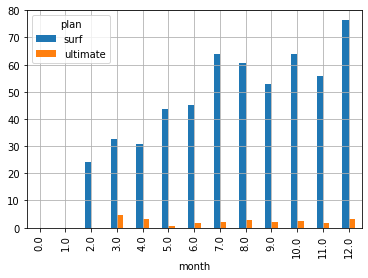

In [ ]:
# Compara la cantidad de usd extras pagados por usuarios por plan
usd_extra_pivot = combi_total_copy.pivot_table(index='month', columns='plan', values='ingreso_extras_mensual')
usd_extra_pivot.plot(kind='bar', grid=True)

In [ ]:
# Calcula la media y la varianza de la cantidad de usd extra por usuario por mes.
media_usd = combi_total_copy['ingreso_total_mensual'].mean()
var_usd = combi_total_copy['ingreso_total_mensual'].var()
print(f'La media de la cantidad de usd es: {media_usd}')
print(f'La varianza de la cantidad de usd es: {var_usd}')

La media de la cantidad de usd es: 76.85966131133304
La varianza de la cantidad de usd es: 3743.109054098967


<AxesSubplot:>

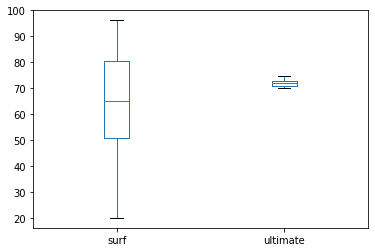

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad de usd.
usd_total_pivot.plot(kind='box')

<AxesSubplot:>

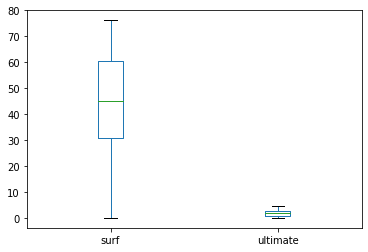

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad de usd extra.
usd_extra_pivot.plot(kind='box')

- Tras observar ambas distribuciones y los graficos para ambos planes de cuanto paga cada uno de solo extras y del extra mas el costo del plan podemos observar que para el usuario es mejor pagar por el plan ultimate debido a que en esencia pagan menos total y de igual manera pagan menos extras debido a que su plan incluye mas cosas, pero para la empresa y sus ingresos es mejor ponerle promocion al plan surf debido a que los usuarios pagan mas en total debido a la cantidad de mensajes, llamadas y gb extras que usan.

- H₀ = La media de ingresos es igual para ambos planes.
- H₁ = La media de ingresos NO es igual para ambos planes.

In [ ]:
plan_ultimate = combi_total_copy[combi_total_copy['plan']=='ultimate']
ingreso_ultimate = plan_ultimate['ingreso_total_mensual']
plan_surf = combi_total_copy[combi_total_copy['plan']=='surf']
ingreso_surf = plan_surf['ingreso_total_mensual']

In [ ]:
# Prueba las hipótesis
alpha = 0.05
results = st.ttest_ind(ingreso_ultimate, ingreso_surf, equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

p-value:  0.00046139227110704906
Rechazamos la hipótesis nula


- Como podemos observar tras realizar un analisis estadistico de los ingresos para ambos planes y declarar nuestras hipotesis nos encontramos con que tenemos suficiente evidencia para rechazar la hipotesis nula, lo que quiere decir que aceptamos la hipotesis alternativa que en este caso implica que la media no es igual para ambos planes.

- H₀ = El ingreso es igual para ambas ciudades.
- H₁ = El ingreso NO es igual para ambas ciudades.

In [ ]:
ciudad_ny = combi_total_copy[combi_total_copy['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
ingreso_ny = combi_total_copy['ingreso_total_mensual']
ciudad_others = combi_total_copy[combi_total_copy['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']
ingreso_others = combi_total_copy['ingreso_total_mensual']

In [ ]:
# Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.
alpha = 0.05
results = st.ttest_ind(ingreso_ny, ingreso_others, equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

p-value:  1.0
No rechazamos la hipótesis nula


- El caso contrario al anterior analisis, aqui no rechazariamos la hipotesis nula pero esto no quiere decir que aceptamos la hipotesis nula sino que no existe suficiente evidencia para rechazarlo, dicho de otra manera esto requeriria un analisis mas profundo para poder rechazar o aceptar dichas hipotesis. Tambien podemos ver que nos da un valor de p de 1.0.

# Conclusión general

- Como conclusion general podemos observar que a la hora de analizar ambas hipotesis respecto a si el ingreso es igual para ambas ciudades no se puede rechazar la hipotesis nula lo cual nos da a entender que tanto ingresos para diferentes ciudades entonces no tenemos evidencia suficiente para poder rechazar la hipotesis nula, a su vez para el analisis estadistico de si los ingresos para ambos planes eran diferentes se logro rechazar la hipotesis nula dando como resultado que la media no es igual para ambos planes. A lo largo de este proyecto se analizaron diferentes bases de datos las cuales se preprocesaron, se enriquecieron y se corrigieron los problemas que pudieran tener, tras tener las bases de datos procesadas se realizaron diferentes analisis estadisticos y graficos para poder encontrarnos con los motivos o problemas que pudieran tener dichas muestras poblacionales, de igual manera se realizaron analisis estadisticos de medias diferentes a ambas estipulando diferentes hipotesis nulas y alternativas para finalmente dar una conclusion respecto al estudio realizado, dicha conclusion esta escrita en este punto al inicio. Nos dimos cuenta tras realizar el analisis de los servicios utilizados por el usuario que habia personas que no tenian ni un consumo para ellos, dicho de otra manera, no usaban dichos servicios y solo estaban pagando por el plan sin realizar ni una llamada, mandar ni un mensaje, ni utilizar ni un MB/GB de internet. Finalmente como conclusion personal tras el profundo analisis realizado puedo decir que el plan 'ultimate' es mas rentable debido a que la cantidad de usuarios de dicho plan no realizo casi ningun cargo extra por excederse de lo incluido dentro del mismo.